In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split,cross_val_score



In [0]:
np.random.seed(32)
X,y = make_circles(n_samples=450, factor=0.1, noise = 0.35, random_state=32)


In [5]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,

In [0]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33)

In [7]:
len(X_train)

301

In [25]:
d3 = DecisionTreeClassifier(random_state = 32)
d3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

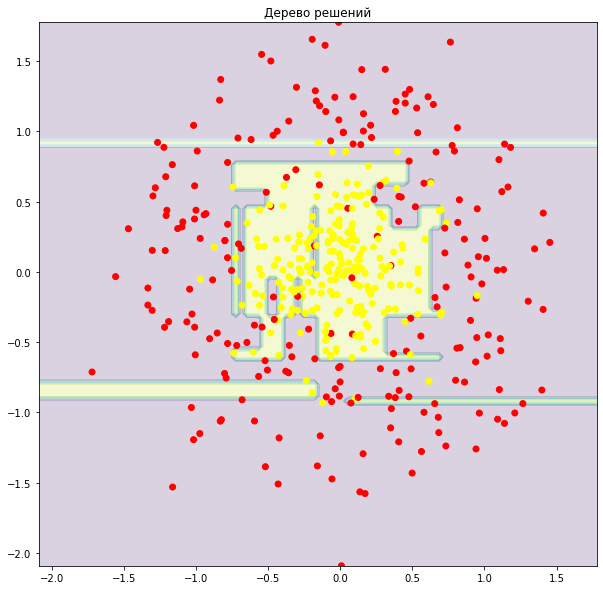

In [12]:
x_range = np.linspace(X.min(), X.max(), 100)
plt.figure(figsize=(10,10))
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = d3.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

In [26]:
forest = RandomForestClassifier(random_state=32, n_estimators=300)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

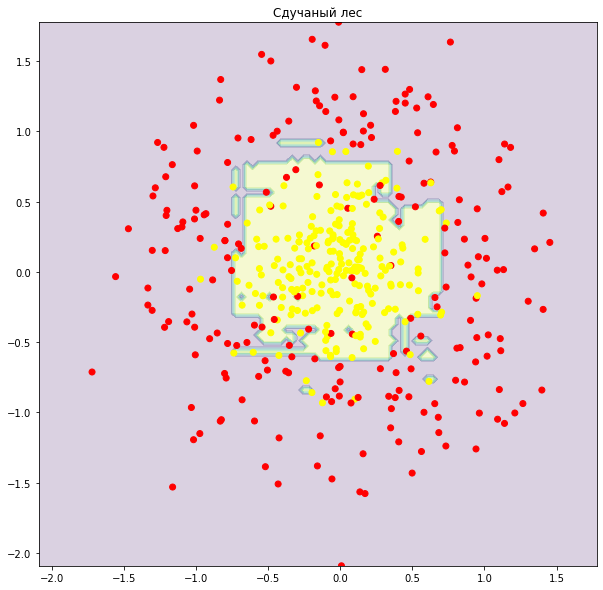

In [16]:
x_range = np.linspace(X.min(), X.max(), 100)
plt.figure(figsize=(10,10))
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = forest.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Сдучаный лес")
plt.show()

In [44]:
treescore = cross_val_score(d3,X,y, cv=5)
treescore.mean()


0.8177777777777777

In [45]:
forestscore = cross_val_score(forest,X,y, cv=5)
forestscore.mean()

0.8555555555555555

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
X,y = load_breast_cancer(return_X_y = True)

In [34]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [0]:
from sklearn import svm

In [42]:
svm_alg = svm.SVC(kernel="rbf")
svm_alg.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
svmtscore = cross_val_score(svm_alg,X,y, cv=5)
svmtscore.mean()

0.8666666666666666